In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [52]:
import pandas as pd

# Try reading the CSV file with different encodings
try:
    df = pd.read_csv('Walmart Dataset.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('Walmart Dataset.csv', encoding='utf-8-sig')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv('Walmart Dataset.csv', encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv('Walmart Dataset.csv', encoding='ISO-8859-1')

# Once the DataFrame is loaded successfully, you can proceed with your analysis.


In [53]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [54]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9945.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156972   
std    2885.163629  32063.693350    623.245101     2.225110     0.206668   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [55]:
null_values = df.isnull().sum()

# Display null values count for each column
print(null_values)

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64


In [56]:
ShipMode_unique_values = df['Ship Mode'].unique()
print(ShipMode_unique_values)

['Second Class' 'Standard Class' nan 'First Class' 'Same Day']


In [57]:
Segment_unique_values = df['Segment'].unique()
print(Segment_unique_values )

['Consumer' 'Corporate' 'Home Office']


In [58]:
State_unique_values = df['State'].unique()
print(State_unique_values )

['Kentucky' 'California' 'Florida' 'CALIFORNIA' 'North Carolina'
 'Washington' 'Texas' 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania'
 'Illinois' 'Minnesota' 'Michigan' 'Delaware' 'Indiana' 'New York'
 'Arizona' 'Virginia' 'Tennessee' 'Alabama' 'South Carolina' 'Oregon'
 'Colorado' 'Iowa' 'Ohio' 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana'
 'Connecticut' 'New Jersey' 'Massachusetts' 'Georgia' 'Nevada'
 'Rhode Island' 'Mississippi' 'Arkansas' 'Montana' 'New Hampshire'
 'Maryland' 'District of Columbia' 'Kansas' 'Vermont' 'Maine'
 'South Dakota' 'Idaho' 'North Dakota' 'Wyoming' 'West Virginia']


In [59]:
City_unique_values = df['City'].unique()
print(City_unique_values )

['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorado Springs'
 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada' 'Hackensack'
 'Saint Petersburg'

In [60]:
Region_unique_values = df['Region'].unique()
print(Region_unique_values )

['South' 'West' 'Central' 'East']


In [61]:
df['State'] = df['State'].replace('CALIFORNIA', 'California')


In [62]:
State_unique_values = df['State'].unique()
print(State_unique_values )

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [63]:
df.duplicated().sum()

0

In [64]:
# Assuming df is your DataFrame
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Drop duplicate rows
df.drop_duplicates(inplace=True)


Duplicate Rows:
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


In [65]:
print("Missing Values Before Handling:")
print(df.isnull().sum())

# Step 2: Handle missing values
# For 'Ship Mode' column, fill missing values with mode
df['Ship Mode'] = df['Ship Mode'].fillna(df['Ship Mode'].mode().iloc[0])

# For 'Discount' column, replace nulls with zeros
df['Discount'].fillna(0, inplace=True)

# Step 3: Check if missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())

Missing Values Before Handling:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode        23
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount         49
Profit            0
dtype: int64

Missing Values After Handling:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


C:\Users\ali\AppData\Local\Temp\ipykernel_13916\320694162.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount'].fillna(0, inplace=True)


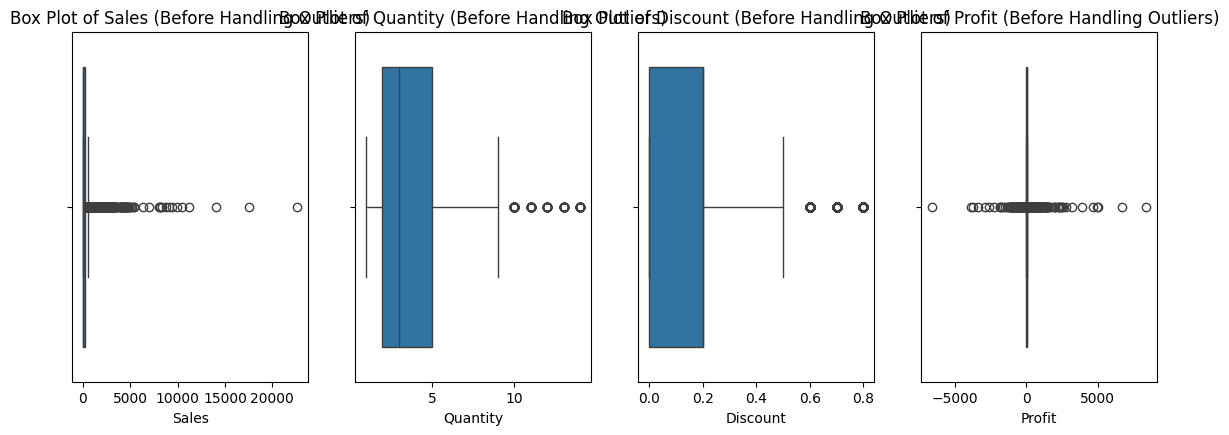

In [66]:
columns_to_handle_outliers = ['Sales', 'Quantity', 'Discount', 'Profit']

# Step 1: Before handling outliers (box plots)
plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_handle_outliers, 1):
    plt.subplot(2, len(columns_to_handle_outliers), i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column} (Before Handling Outliers)')
    plt.xlabel(column)

C:\Users\ali\AppData\Local\Temp\ipykernel_13916\653974515.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] < lower_fence, column] = lower_fence


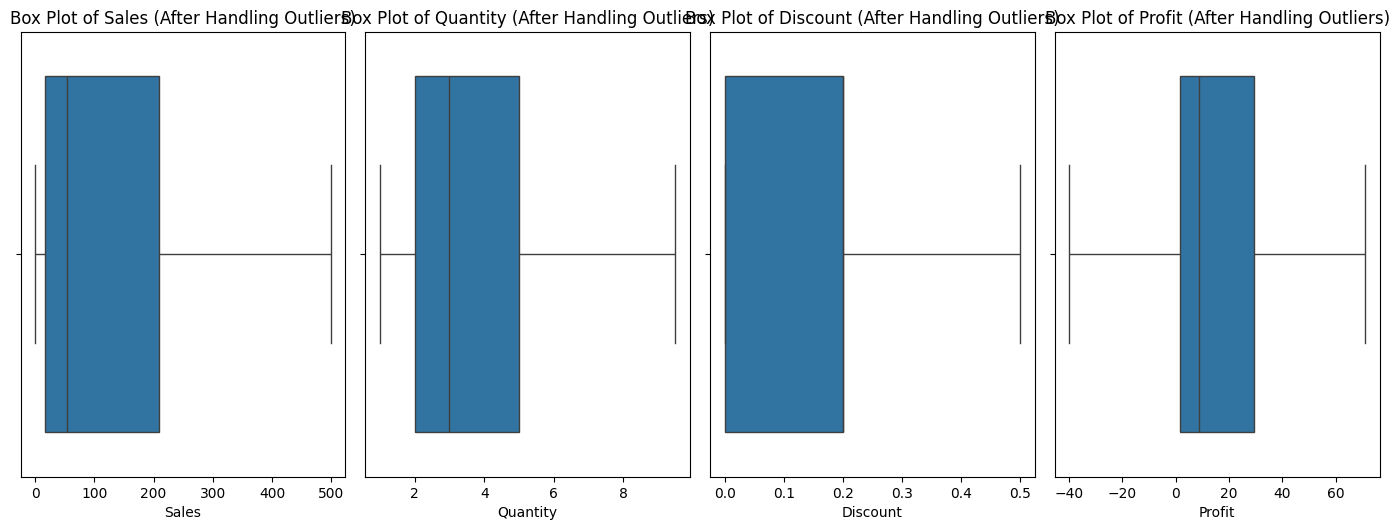

In [67]:


def handle_outliers_iqr(df, column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    df.loc[df[column] < lower_fence, column] = lower_fence
    df.loc[df[column] > upper_fence, column] = upper_fence

data_cleaned = df.copy()

for column in columns_to_handle_outliers:
    # Check if data type is numerical
    if df[column].dtype.name != 'object':
        try:
            # Apply the handle_outliers_iqr function
            handle_outliers_iqr(data_cleaned, column)
        except:
            # Handle potential errors during quartile calculation (e.g., for non-numeric data)
            print(f"Warning: Outlier handling failed for column {column}")
    else:
        # Handle non-numerical data (consider alternative approaches)
        print(f"Column {column} is not numerical. Outlier handling skipped.")

plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_handle_outliers, 1):
    if df[column].dtype.name != 'object':  # Only plot numerical columns
        plt.subplot(2, len(columns_to_handle_outliers), i)
        sns.boxplot(x=data_cleaned[column])
        plt.title(f'Box Plot of {column} (After Handling Outliers)')
        plt.xlabel(column)
plt.tight_layout()
plt.show()


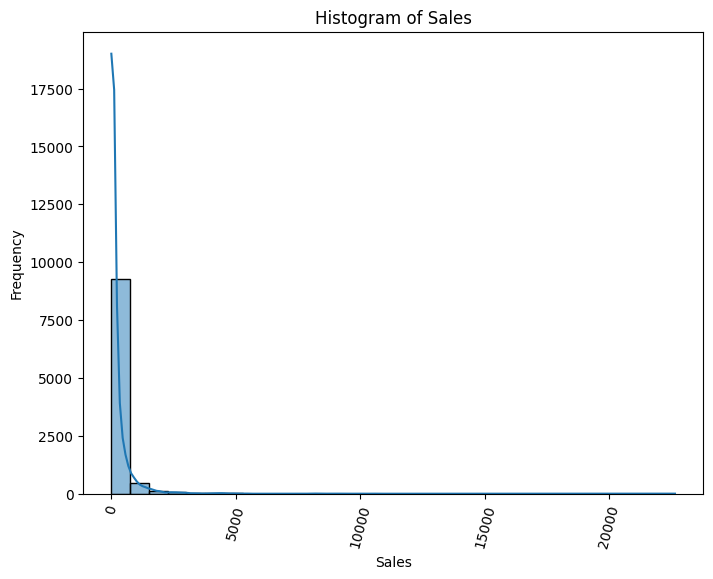

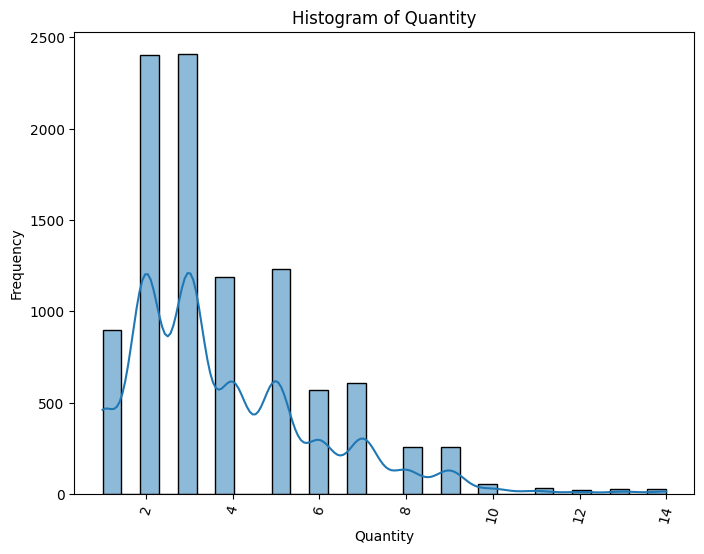

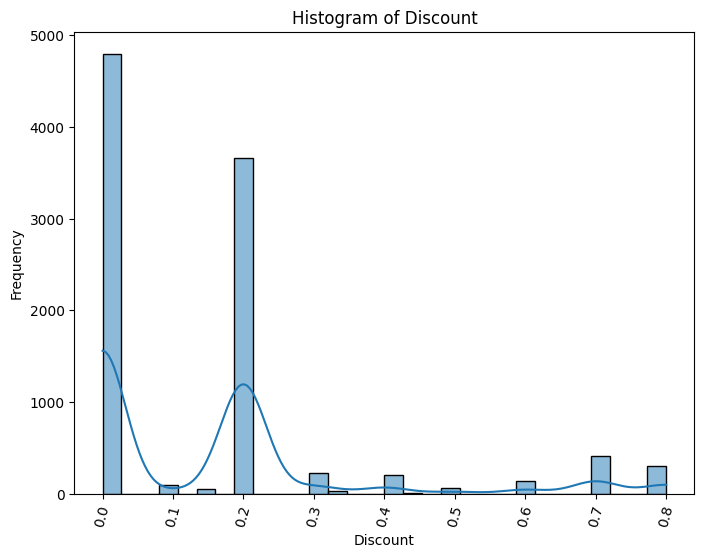

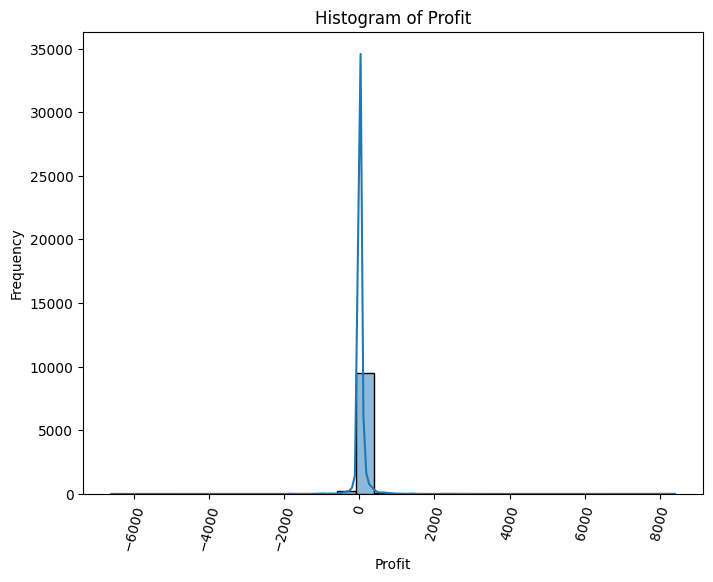

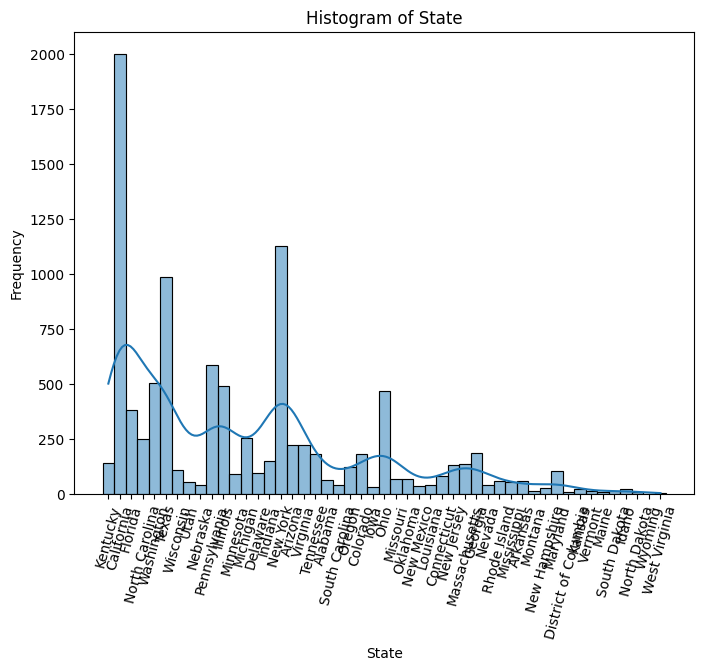

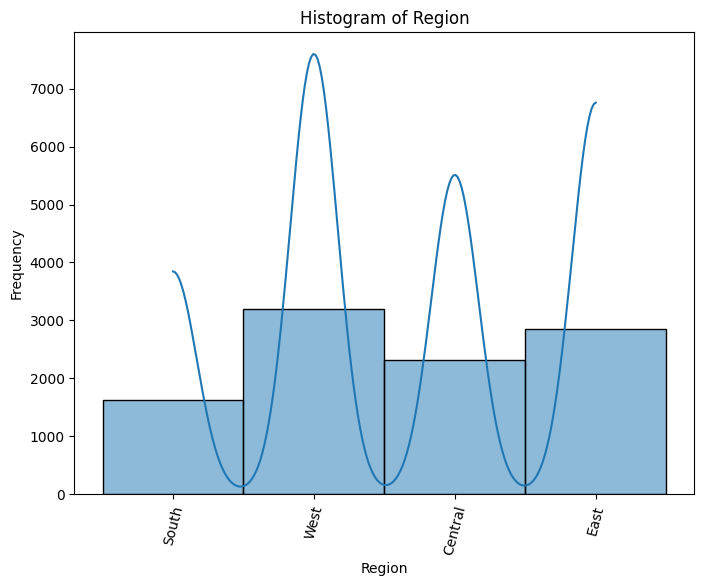

In [68]:
columns_for_histogram = ['Sales', 'Quantity', 'Discount', 'Profit','State','Region']

# Create histograms for each column
for column in columns_for_histogram:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation = 75)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Summary Statistics:
             Sales     Quantity     Discount       Profit
count  9994.000000  9994.000000  9994.000000  9994.000000
mean    140.281105     3.753352     0.137451    16.068014
std     168.804241     2.102557     0.157680    29.486488
min       0.444000     1.000000     0.000000   -39.724125
25%      17.280000     2.000000     0.000000     1.728750
50%      54.490000     3.000000     0.200000     8.666500
75%     209.940000     5.000000     0.200000    29.364000
max     498.930000     9.500000     0.500000    70.816875


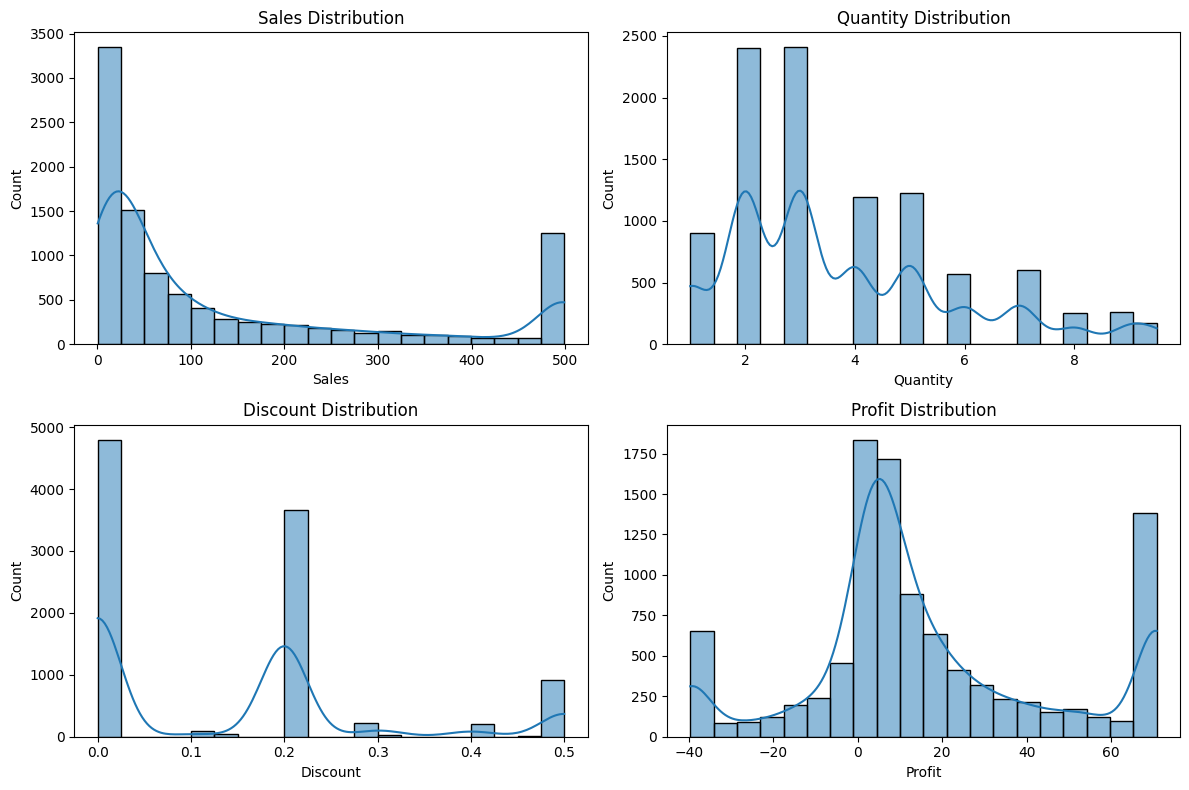

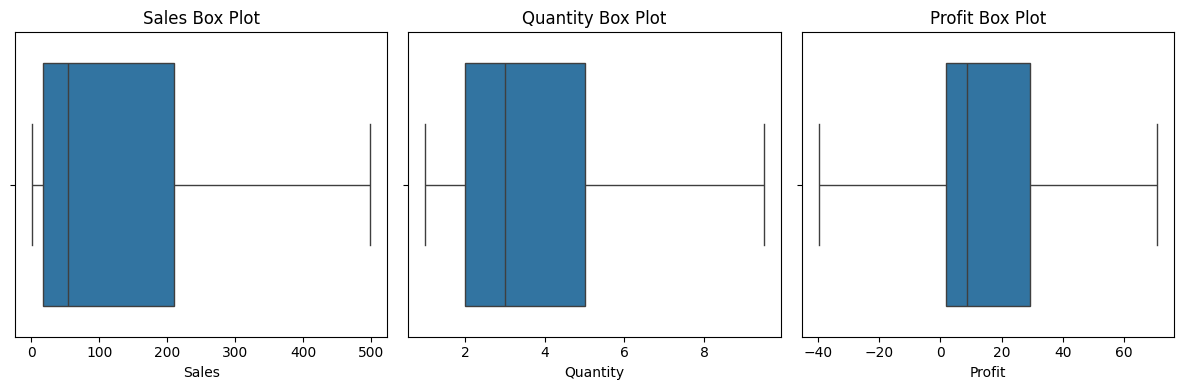

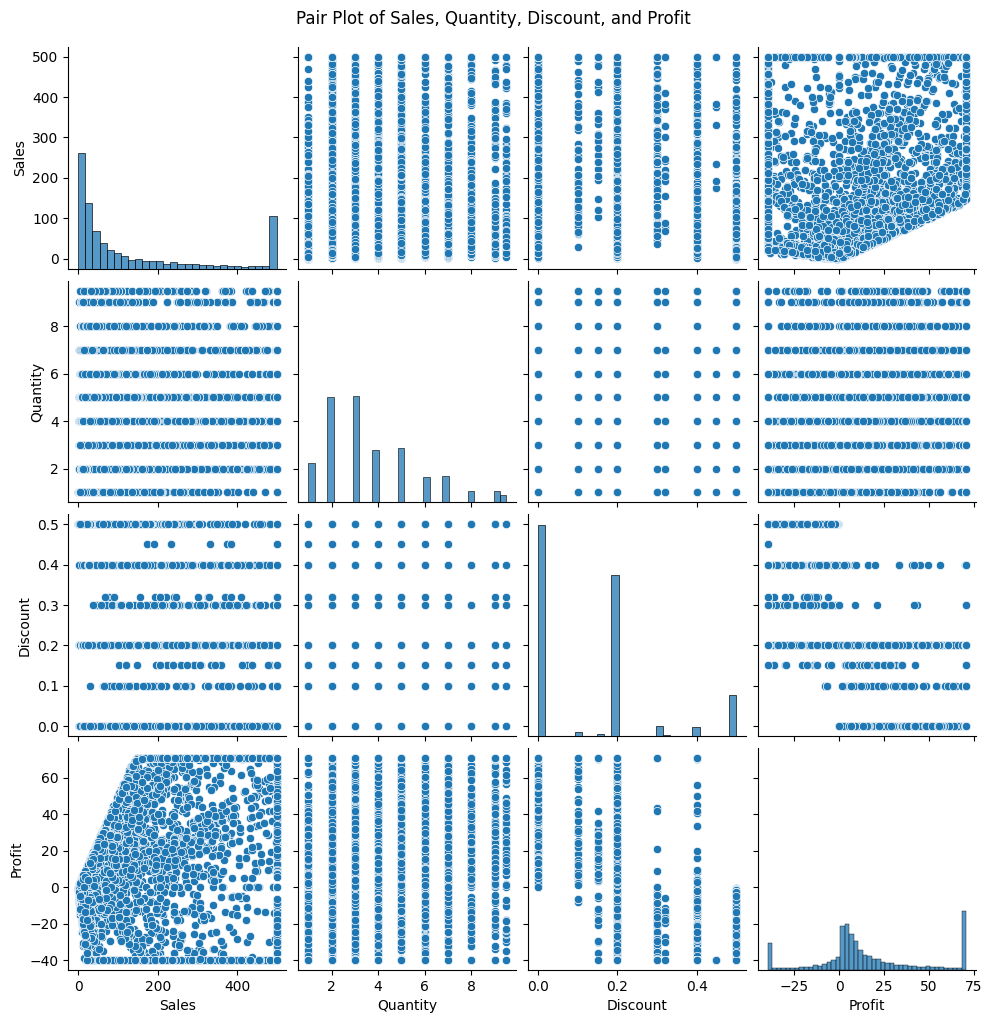

In [69]:
# Summary Statistics
summary_stats = data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']].describe()
print("Summary Statistics:")
print(summary_stats)

# Visualization Methods
# Histograms
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=data_cleaned, x='Sales', kde=True, bins=20)
plt.title('Sales Distribution')

plt.subplot(2, 2, 2)
sns.histplot(data=data_cleaned, x='Quantity', kde=True, bins=20)
plt.title('Quantity Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data=data_cleaned, x='Discount', kde=True, bins=20)
plt.title('Discount Distribution')

plt.subplot(2, 2, 4)
sns.histplot(data=data_cleaned, x='Profit', kde=True, bins=20)
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=data_cleaned, x='Sales')
plt.title('Sales Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(data=data_cleaned, x='Quantity')
plt.title('Quantity Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(data=data_cleaned, x='Profit')
plt.title('Profit Box Plot')

plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(data_cleaned[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.suptitle('Pair Plot of Sales, Quantity, Discount, and Profit', y=1.02)
plt.show()


In [70]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [71]:
output_file_path=r'D:\BI\BI_project\Walmart.csv'

In [72]:
df.to_csv(output_file_path,index=False)

In [73]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [74]:
df['Order Date']=pd.to_datetime(df['Order Date'])
#df.set_index('Order Date')
df['Order Date']=df['Order Date'].dt.strftime('%Y-%m')
# Group by 'Order Date' and sum the 'Sales' within each grou
df_sorted = df.sort_values(by='Order Date')
daily_sales = df_sorted.groupby('Order Date')['Sales'].sum()

# Convert the resulting Series to a new DataFrame
daily_sales_df = daily_sales.reset_index()
daily_sales_df.set_index('Order Date',inplace=True)

In [75]:
daily_sales_df

,Sales
Order Date,
2014-01,14236.8950
2014-02,4519.8920
2014-03,55691.0090
2014-04,28295.3450
2014-05,23648.2870
2014-06,34595.1276
2014-07,33946.3930
2014-08,27909.4685
2014-09,81777.3508


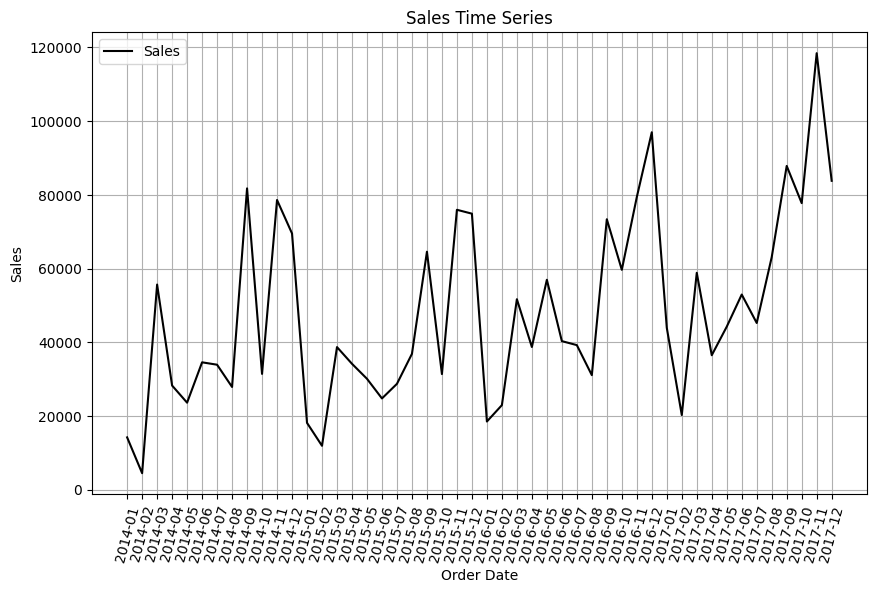

In [76]:
# Step 1: Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_df.index, daily_sales_df['Sales'], label='Sales', color='black')
plt.title('Sales Time Series')
plt.xlabel('Order Date')
plt.xticks(rotation = 75)
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [77]:
def stationarize_series(series):
    # Calculate rolling statistics
    rolling_mean = series.rolling(window=12).mean()
    rolling_std = series.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='green')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.xticks(rotation = 75)
    plt.ylabel('Number of Passengers')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Perform Dickey-Fuller test
    result = adfuller(series)
    print('p-value:', result[1])


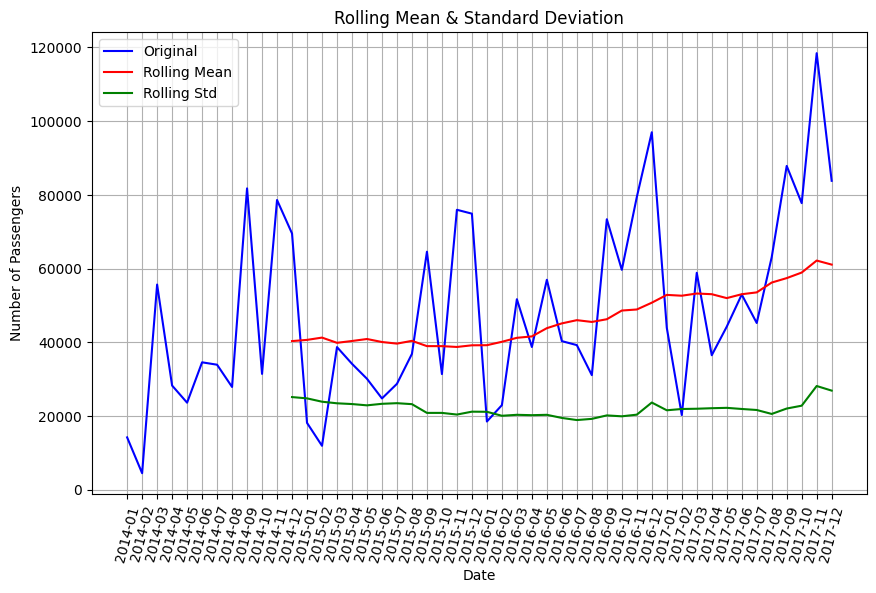

p-value: 0.00020180198458237704


In [78]:
# Apply stationarize_series function
stationarize_series(daily_sales_df['Sales'])

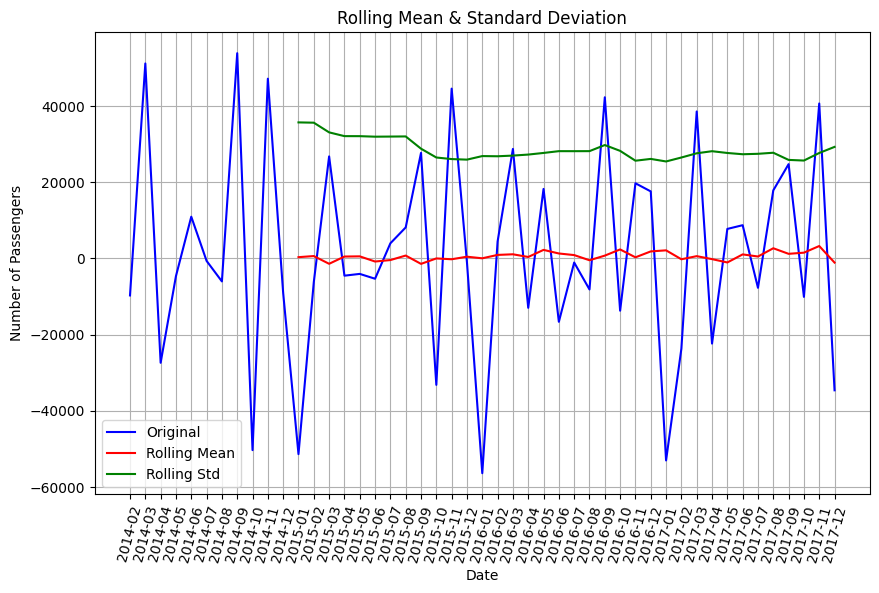

p-value: 4.653163912897031e-15


In [79]:
stationarize_series(daily_sales_df.Sales.diff().dropna())

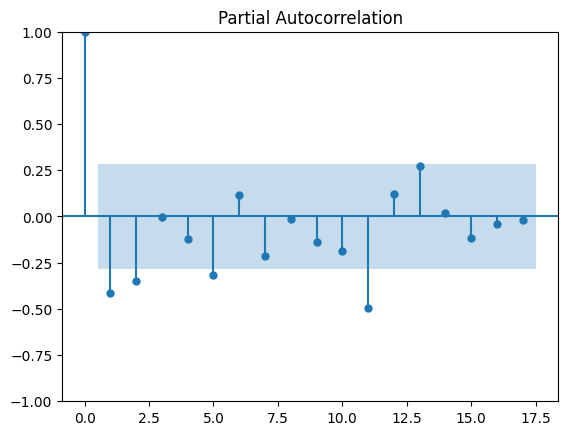

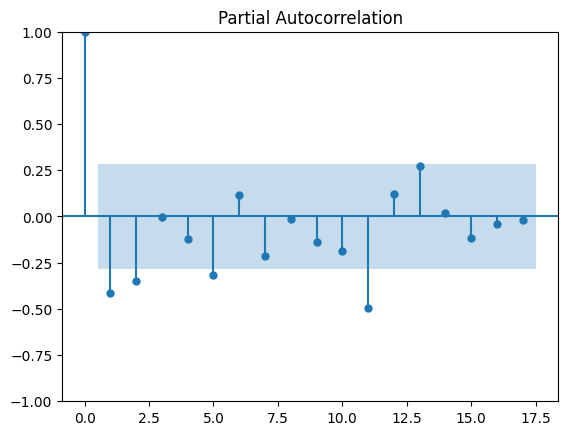

In [80]:
# Finding the value of the p parameter
plot_pacf(daily_sales_df.Sales.diff().dropna())

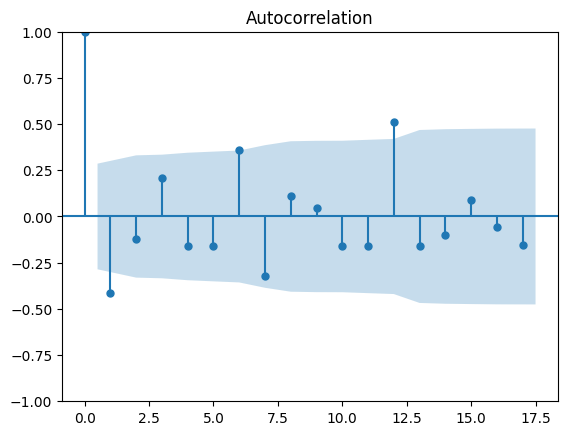

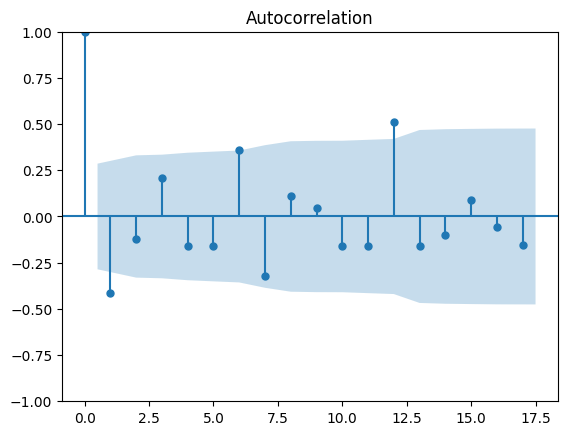

In [81]:
# Finding the value of the q parameter
plot_acf(daily_sales_df.Sales.diff().dropna())

In [82]:
# Based on the ACF and PACF plots, we can try ARIMA(1,1,1) or ARIMA(1,1,2)
model = ARIMA(daily_sales_df['Sales'], order=(20,1,10))
arima_model = model.fit()
#arima_model.summary()

# Step 5: Predict
forecast = arima_model.predict()
#forecast = arima_model.forecast()


C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\lo

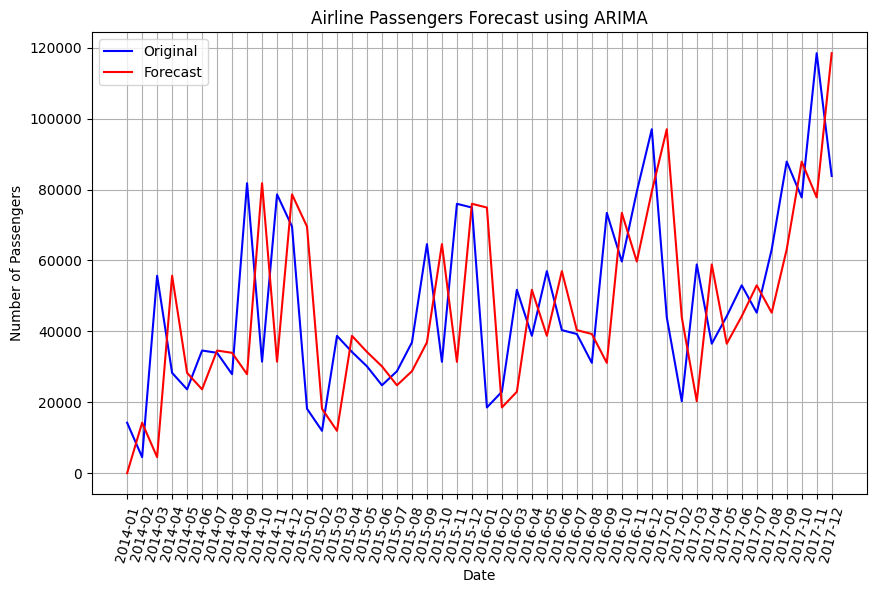

In [83]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_sales_df.index, daily_sales_df['Sales'], label='Original', color='blue')
plt.plot(daily_sales_df.index ,  forecast, label='Forecast', color='red')
plt.title('Airline Passengers Forecast using ARIMA')
plt.xlabel('Date')
plt.xticks(rotation = 75)
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [84]:
start_index='2017-1'
end_index='2020-12'
forecast_df=arima_model.predict(start=start_index,end=end_index,dynamic=False)

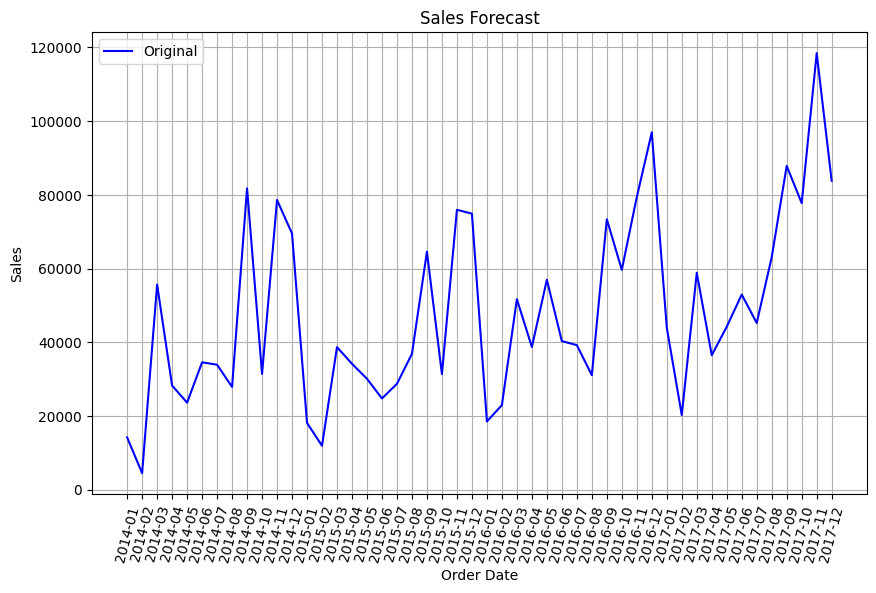

In [85]:
#plot forecast
plt.figure(figsize=(10,6))
plt.plot(daily_sales_df.index , daily_sales_df['Sales'], label='Original',color='blue')
#plt.plot(pd.date_range(start=daily_sales_df.index[-1],periods=48,freq='MS') , forecast_df,label='Forecast',color='red')
plt.title('Sales Forecast')
plt.xlabel('Order Date')
plt.xticks(rotation=75)
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [87]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [88]:
df['Category']=df['Category'].map({'Office Supplies': 0, 'Furniture': 1, 'Technology': 2})

In [89]:
columns_to_drop = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Region', 'Product ID','Sub-Category', 'Product Name','Sales', 'Ship Mode', 'Segment']
x = df.drop( columns=columns_to_drop, axis =1)
y = df['Sales']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [91]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [92]:
mean_squared_error(y_test, y_pred)

235349.05943946927

In [93]:
r2_score(y_test, y_pred)

0.44371490683217474

In [94]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [95]:
poly_feature = poly.fit_transform(x)

In [96]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(poly_feature, y, test_size=0.3, random_state=0)

In [97]:
polyreg = LinearRegression()
polyreg.fit(x_train_poly, y_train_poly)
y_pred_poly = polyreg.predict(x_test_poly)

In [98]:
r2_score(y_test_poly, y_pred_poly)

0.7485841858698485

In [99]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)
r2_score(y_test, y_pred)

0.5818236431242465

In [100]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
r2_score(y_test, y_pred)

0.7909851942786104